In [1]:

# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import cv2
# load the image
img = load_img('cigar100x75.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-26,20])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
    
# show the figure
pyplot.show()

Using TensorFlow backend.


<Figure size 640x480 with 9 Axes>

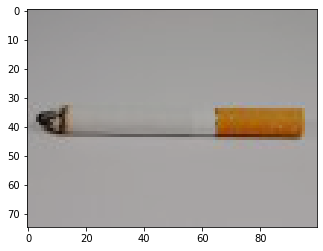

In [2]:
# example of brighting image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('cigar100x75.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.1,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

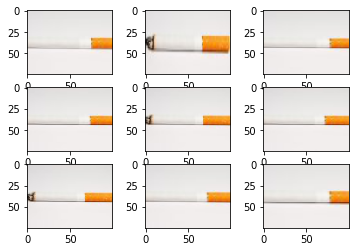

In [3]:
# example of zoom image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('cigar100x75.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [4]:
import cv2
import numpy as np
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import clear_output

class ExtractImage(object):
    def __init__(self,image_name):
        self.image_name = image_name
        self.original_image = cv2.imread(self.image_name)

        self.original_image = cv2.resize(self.original_image, (50,50))
        self.clone = self.original_image.copy()

        cv2.namedWindow('image')
        cv2.setMouseCallback('image', self.extract_coordinates)
        self.image_coordinates = []


In [5]:
def extract_coordinates(self, event, x, y, flags, parameters):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.image_coordinates = [(x,y)]

        elif event == cv2.EVENT_LBUTTONUP:
            self.image_coordinates.append((x,y))
            self.crop_ROI()
            # Draw rectangle around region of interest(ROI)
            cv2.rectangle(self.clone, self.image_coordinates[0], self.image_coordinates[1], (255,0,0), 2)
            cv2.imshow("image", self.clone) 

        # Clear all drawn boxes on right mouse button click
        elif event == cv2.EVENT_RBUTTONDOWN:
            self.clone = self.original_image.copy()


In [6]:
def crop_ROI(self):
        self.cropped_image = self.clone.copy()
        self.cropped_image = self.cropped_image[self.image_coordinates[0][1]:self.image_coordinates[1][1],
                                                self.image_coordinates[0][0]:self.image_coordinates[1][0]]

        print('Cropped image: {} {}'.format(self.image_coordinates[0], self.image_coordinates[1]))


In [7]:
def save_with__rotate_augmentation(self):
        # Generating 6 photos rotated 90 degrees
        # If you want you can use another augmentation techniques
        samples = expand_dims(self.cropped_image, 0)
        datagen = ImageDataGenerator(rotation_range=90)
        it = datagen.flow(samples, batch_size=1)
        
        for i in range(6):
            batch = it.next()
            image = batch[0].astype('uint8')
            cv2.imwrite('augmentation' + str(i) + str('.jpg'),image)
            
def save_with_zoom_augmentation(self):
    
        samples = expand_dims(self.cropped_image, 0)
        # create image data augmentation generator
        datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
        # prepare iterator
        it = datagen.flow(samples, batch_size=1)
        
        for i in range(6):
            batch = it.next()
            image = batch[0].astype('uint8')
            cv2.imwrite('augmentation' + str(i) + str('.jpg'),image)
            
            
            
def show_image(self):
        return self.clone
    
def show_cropped_ROI(self):
        cv2.imshow('cropped image', self.cropped_image)
        
def save_cropped_ROI(self):
        cv2.imwrite('crop.jpg',self.cropped_image)
        



In [ ]:
import cv2
import numpy as np
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import clear_output



class ExtractImage(object):
    def __init__(self,image_name):
        self.image_name = image_name
        self.original_image = cv2.imread(self.image_name)

        self.original_image = cv2.resize(self.original_image, (300,300))
        self.clone = self.original_image.copy()

        cv2.namedWindow('image')
        cv2.setMouseCallback('image', self.extract_coordinates)
        self.image_coordinates = []

    def extract_coordinates(self, event, x, y, flags, parameters):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.image_coordinates = [(x,y)]

        elif event == cv2.EVENT_LBUTTONUP:
            self.image_coordinates.append((x,y))
            self.crop_ROI()

            # Draw rectangle around region of interst(ROI)
            cv2.rectangle(self.clone, self.image_coordinates[0], self.image_coordinates[1], (255,0,0), 2)
            cv2.imshow("image", self.clone) 

        # Clear all drawn boxes on right mouse button click
        elif event == cv2.EVENT_RBUTTONDOWN:
            self.clone = self.original_image.copy()

    def crop_ROI(self):
        self.cropped_image = self.clone.copy()
        self.cropped_image = self.cropped_image[self.image_coordinates[0][1]:self.image_coordinates[1][1],
                                                self.image_coordinates[0][0]:self.image_coordinates[1][0]]

        print('Cropped image: {} {}'.format(self.image_coordinates[0], self.image_coordinates[1]))
    
    def save_with_rotate_augmentation(self):
        # Generating 6 photos rotated 90 degrees
        # If you want you can use another augmentation techniques
        samples = expand_dims(self.cropped_image, 0)
        datagen = ImageDataGenerator(rotation_range=90)
        it = datagen.flow(samples, batch_size=1)
        
        for i in range(20):
            batch = it.next()
            image = batch[0].astype('uint8')
            cv2.imwrite('augmentation' + str(i) + str('.jpg'),image)
    
    def save_with_zoom_augmentation(self):
        # Generating 6 photos rotated 90 degrees
        # If you want you can use another augmentation techniques
        samples = expand_dims(self.cropped_image, 0)
        datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
        it = datagen.flow(samples, batch_size=1)
        
        for i in range(20):
            batch = it.next()
            image = batch[0].astype('uint8')
            cv2.imwrite('augmentation' + str(i) + str('.jpg'),image)
            
    def save_with_shift_augmentation(self):
        # Generating 6 photos rotated 90 degrees
        # If you want you can use another augmentation techniques
        samples = expand_dims(self.cropped_image, 0)
        datagen = ImageDataGenerator(width_shift_range=[-26,20])
        it = datagen.flow(samples, batch_size=1)
        
        for i in range(20):
            batch = it.next()
            image = batch[0].astype('uint8')
            cv2.imwrite('augmentation' + str(i) + str('.jpg'),image)
    
     
    def save_with_brightness_augmentation(self):
        # Generating 6 photos rotated 90 degrees
        # If you want you can use another augmentation techniques
        samples = expand_dims(self.cropped_image, 0)
        datagen = ImageDataGenerator(brightness_range=[0.1,1.0])
        it = datagen.flow(samples, batch_size=1)
        
        for i in range(20):
            batch = it.next()
            image = batch[0].astype('uint8')
            cv2.imwrite('augmentation' + str(i) + str('.jpg'),image)
            
    
    
    def show_image(self):
        return self.clone
    
    def show_cropped_ROI(self):
        cv2.imshow('cropped image', self.cropped_image)
        
    def save_cropped_ROI(self):
        cv2.imwrite('crop.jpg',self.cropped_image)
        
if __name__ == '__main__':
    extract_image = ExtractImage('cigareee.jpg') # Write your image name
    while True:
        cv2.imshow('image', extract_image.show_image())
        key = cv2.waitKey(1)

        # Close program with keyboard 'q'
        if key == ord('q'):
            cv2.destroyAllWindows()
            cv2.waitKey(0)

        # Crop image with keyboard 'c'
        if key == ord('c'):
            extract_image.show_cropped_ROI()
            
        # Save cropped image with keyboard 's'
        if key == ord('s'):
            extract_image.save_cropped_ROI()
            print('Cropped image saved !')
            
         #Save cropped image with rotate augmentation
        if key == ord('r'):
            extract_image.save_with_rotate_augmentation()
        
         #Save cropped image with zoom augmentation
        if key == ord('z'):
            extract_image.save_with_zoom_augmentation()
            print('Augmented cropped images saved !')
        
         #Save cropped image with shift augmentation
        if key == ord('h'):
            extract_image.save_with_shift_augmentation()
            print('Augmented cropped images saved !')
            
         #Save cropped image with brightness augmentation
        if key == ord('b'):
            extract_image.save_with_brightness_augmentation()
            print('Augmented cropped images saved !')
            
        #Save cropped image with all augmentation
        if key == ord('a'):
            extract_image.save_with_rotate_augmentation()
            extract_image.save_with_zoom_augmentation()
            extract_image.save_with_shift_augmentation()
            extract_image.save_with_brightness_augmentation()
            print('Augmented cropped images saved !')

Using TensorFlow backend.


Cropped image: (67, 35) (211, 251)
Augmented cropped images saved !
